# Predicting Apple Stock Price Direction

In [1]:
## for data preprocessing
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

## Data Exploration

We first import the data using read_csv() in pandas library and check the size of the data: how many rows? how many columns?

In [3]:
# import data using read_csv() in pandas library
df = pd.read_csv("/Users/ellypham/Downloads/apple_data.csv")

In [4]:
# data dimension using df.shape()
print('Apple stock data set has:') 
print(df.shape[0], 'rows,', df.shape[1], 'columns')

Apple stock data set has:
10517 rows, 10 columns


In [5]:
# look at the column name, data type, count of non-null values and the memory usage 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10517 non-null  int64  
 1   index         10517 non-null  int64  
 2   Date          10517 non-null  object 
 3   Open          10517 non-null  float64
 4   High          10517 non-null  float64
 5   Low           10517 non-null  float64
 6   Close         10517 non-null  float64
 7   Volume        10517 non-null  int64  
 8   Dividends     10517 non-null  float64
 9   Stock Splits  10517 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 821.8+ KB


We have 8 numerical fields, and 1 object which is date. No null value at all and 739.6 kb in size.

In [6]:
# look at the distribution of numerical fields using describe() method
df.describe()

,Unnamed: 0,index,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10517.000000,10517.000000,10517.000000,10517.000000,10517.000000,10517.000000,1.051700e+04,10517.000000,10517.000000
mean,5258.000000,5258.000000,14.760635,14.926131,14.599052,14.769176,3.296316e+08,0.000628,0.001616
std,3036.140725,3036.140725,32.940129,33.332256,32.566604,32.966523,3.385203e+08,0.010331,0.085554
min,0.000000,0.000000,0.038711,0.038711,0.038276,0.038276,0.000000e+00,0.000000,0.000000
25%,2629.000000,2629.000000,0.236051,0.242122,0.230526,0.236329,1.228416e+08,0.000000,0.000000
50%,5258.000000,5258.000000,0.395741,0.402867,0.388646,0.395509,2.172800e+08,0.000000,0.000000
75%,7887.000000,7887.000000,13.269444,13.445210,13.158978,13.285326,4.090016e+08,0.000000,0.000000
max,10516.000000,10516.000000,181.877391,182.186111,178.381846,181.259933,7.421641e+09,0.230000,7.000000


We will drop the unnamed column since it is not useful for this analysis.

In [7]:
# look at the distribution of the date field using describe() method 
# we need to call it separately because the above functions is implicit, it will only consider the numerical data types
df['Date'].describe()

count          10517
unique         10517
top       1980-12-12
freq               1
Name: Date, dtype: object

In [8]:
# find out min and max of the date object
print('the date range is from', df['Date'].min(), 'to', df['Date'].max())

the date range is from 1980-12-12 to 2022-08-29


# Data Preprocessing

In [9]:
# Change the data type of `Date` and `Volume` using astype() method
df = df.astype({'Date': 'datetime64[ns]',
      'Volume': 'float'})

In [10]:
# Drop unnamed column using drop() method
# we define axis = 1 because we want the column to be deleted
df.drop(['Unnamed: 0'], axis = 1)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600.0,0.0,0.0
1,1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800.0,0.0,0.0
2,2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000.0,0.0,0.0
3,3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600.0,0.0,0.0
4,4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10512,10512,2022-08-23,167.080002,168.710007,166.649994,167.229996,54147100.0,0.0,0.0
10513,10513,2022-08-24,167.320007,168.110001,166.250000,167.529999,53841500.0,0.0,0.0
10514,10514,2022-08-25,168.779999,170.139999,168.350006,170.029999,51218200.0,0.0,0.0
10515,10515,2022-08-26,170.570007,171.050003,163.559998,163.619995,78823500.0,0.0,0.0


In [11]:
# here is a slice of the data after preprocessing
df.head()

,Unnamed: 0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600.0,0.0,0.0
1,1,1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800.0,0.0,0.0
2,2,2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000.0,0.0,0.0
3,3,3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600.0,0.0,0.0
4,4,4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600.0,0.0,0.0


Our data ranges from the year of 1980 - 2022, therefore we will divide data by 60/20/20 for training, validation and testing. 
- Training (1980-12-12 to 2005-12-12)
- Validation (2005-12-13 to 2013-12-13)
- Testing (2013-12-14 to 2022-08-29)

In [12]:
# split data for training, validation and testing
df = df.set_index(df['Date']) # set the date field as index to use for splitting
train = df['1980-12-12':'2014-12-12'] # for training 
validate = df['2014-12-13':'2018-12-13'] # for validation
test  = df['2018-12-14':] # for testing

In [13]:
train.head(2)

,Unnamed: 0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,
1980-12-12,0,0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600.0,0.0,0.0
1980-12-15,1,1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800.0,0.0,0.0


In [14]:
# create vertically stacked subplots using subplots() method in matplotlib library
def make_graph(dt):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    # first plot: green line for the high price 
    ax1.plot(dt['Date'], dt['High'], color = 'green')
    ax1.set_xlabel('Date', fontsize=12) # set the label for x axis
    ax1.set_ylabel('Stock Price') # set the label for y axis
    ax1.set_title('Apple\'s Price History') # title for the first plot

    # first plot: add the red line the low price as 
    ax1.plot(dt['Date'], dt['Low'], color = 'red')

    #second plot: orange line for apple volume history
    ax2.plot(dt['Date'], dt['Volume'], color = 'orange')
    ax2.set_xlabel("Date", fontsize=12)
    ax2.set_ylabel("Stock Volume")
    ax2.set_title("Apple's Volume History")

    ax1.grid() # for the grid line in the first plot
    ax2.grid() # for the grid line in the second plot

    plt.show()

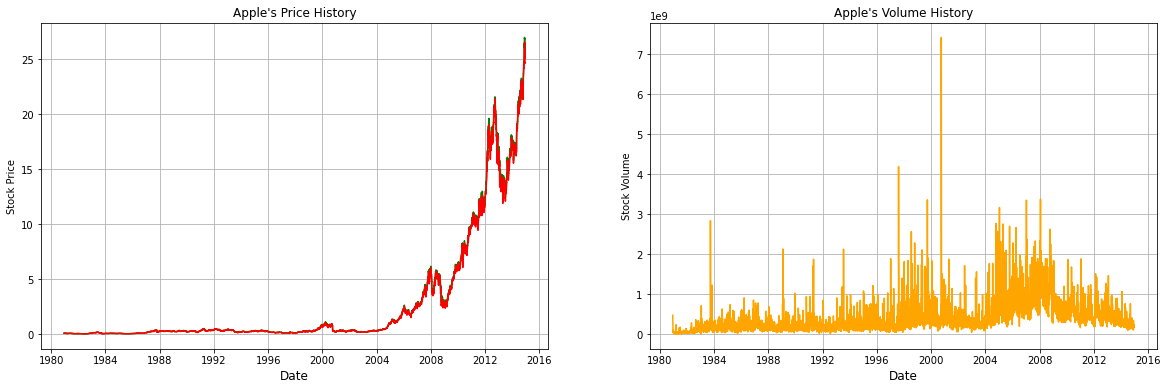

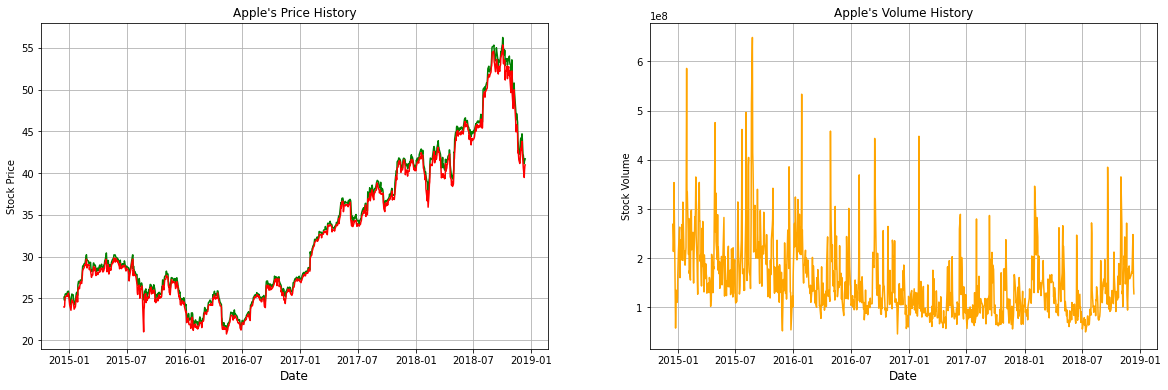

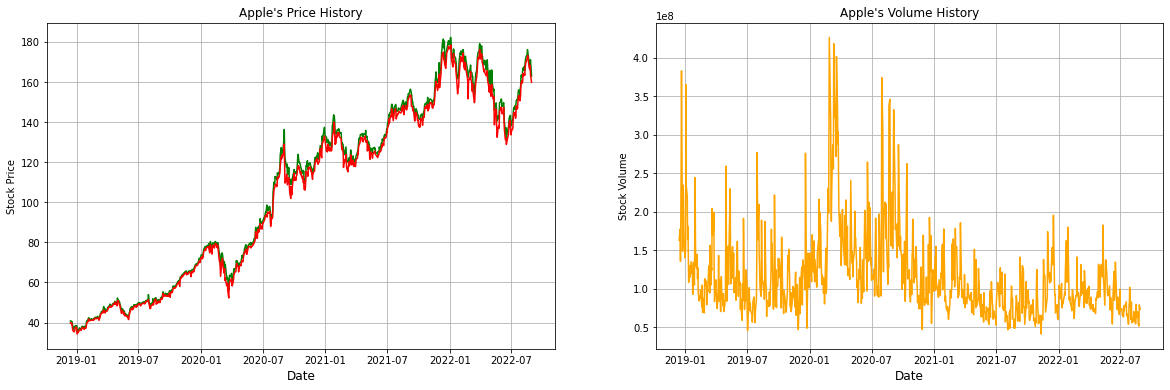

In [15]:
# plotting three data sets: train, validate, test
make_graph(train)
make_graph(validate)
make_graph(test)

Since we wanted to predict the next day and find out whether the next day's close is higher than the next day's open, what we need to do next is to compare the closing and the opening prices one day in advance.

To do that we are going to move the day to one day before that, meaning we shift the data of the next day to a day back. Additionally, we will add a classification column - `Target`. If the closing price is greater than opening price will be 1, otherwise it will be 0. 

Before implementing this shifting (or moving one day prior) method, we are going to sort the data by date in ascending order.

In [16]:
# now we sort the data by date using sort_value() method
# however, we need to reset the index using drop_index() and add the drop parameter to avoid old index being added as a column
train=train.reset_index(drop=True)
train.sort_values(by="Date", inplace=True)

validate=validate.reset_index(drop=True)
validate.sort_values(by="Date", inplace=True)

test=test.reset_index(drop=True)
test.sort_values(by="Date", inplace=True)

In [17]:
# create a function classify_target
# add a new `Target` field: returning True if Close > Open and False if Close < Open
def classify_target(dt):
        dt["Target"] = (dt["Close"] > dt["Open"]) # return true or false 
        dt["Target"] = dt["Target"].shift(periods=-1, fill_value=0) # move back one day and fill out 0 for missing value
        dt["Target"] = dt["Target"].astype(int) # convert data type to integer
        

# apply the function for all three datasets
classify_target(train)
classify_target(validate)
classify_target(test)

train.head()

,Unnamed: 0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
0,0,0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600.0,0.0,0.0,0
1,1,1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800.0,0.0,0.0,0
2,2,2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000.0,0.0,0.0,0
3,3,3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600.0,0.0,0.0,0
4,4,4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600.0,0.0,0.0,0


In [18]:
# check how many days that the closing price is higher than opening price using value_counts() method
def closed_higher(dt):
    print(dt["Target"].value_counts())
    print(dt["Target"].value_counts()[1], "days that is closed at a higher price")
    print(dt["Target"].value_counts()[0], "days that is closed at a lower price")

print("Train data")
closed_higher(train)
print()
print("Validation data")
closed_higher(validate)
print()
print("Test data")
closed_higher(test)

Train data
0    4810
1    3767
Name: Target, dtype: int64
3767 days that is closed at a higher price
4810 days that is closed at a lower price

Validation data
1    530
0    477
Name: Target, dtype: int64
530 days that is closed at a higher price
477 days that is closed at a lower price

Test data
1    504
0    429
Name: Target, dtype: int64
504 days that is closed at a higher price
429 days that is closed at a lower price


# Feature Engineering

Since the stock price data is time series data, the price in the next day depends on price from the previous day. We are going to calculate 3 and 7 day moving average. We can use rolling().

We will add new features: 3 and 7 days moving average in the dataset that are computed rolling mean with a window length of 3 and 7 observations.

Additionally, we will add a price direction feature which is the differenece between closing price and the opening price to try if that would help for our prediction. And, price range which is the difference between high price and low price.

We already sorted the data, therefore we can skip this step.

In [19]:
# rolling mean with a window length of 3 
train["Moving_Average_3"] = (train["Close"] - train["Open"]).rolling(window=3, min_periods=1).mean()
validate["Moving_Average_3"] = (validate["Close"] - validate["Open"]).rolling(window=3, min_periods=1).mean()
test["Moving_Average_3"] = (test["Close"] - test["Open"]).rolling(window=3, min_periods=1).mean()

In [20]:
# rolling mean with a window length of 7
train["Moving_Average_7"] = (train["Close"] - train["Open"]).rolling(window=7, min_periods=1).mean()
validate["Moving_Average_7"] = (validate["Close"] - validate["Open"]).rolling(window=7, min_periods=1).mean()
test["Moving_Average_7"] = (test["Close"] - test["Open"]).rolling(window=7, min_periods=1).mean()

In [21]:
# price direction calculation
train["Price_Direction"] = train["Close"] - train["Open"]
validate["Price_Direction"] = validate["Close"] - validate["Open"]
test["Price_Direction"] = test["Close"] - test["Open"]

In [22]:
# price range calculation
train["Price_Range"] = train["High"] - train["Low"]
validate["Price_Range"] = validate["High"] - validate["Low"]
test["Price_Range"] = test["High"] - test["Low"]

# Machine Learning Algorithms

`sklearn` is a most robust library for classigication modeling. This would be the good option for us to pick in this section.

In [23]:
# y is a variable that we wanted to predict
y = "Target"
# X is given variables that we will input into our model
X = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Price_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"]

In [24]:
# here we are going to extract X and y from all three datasets
X_train = train[X]
y_train = train[y]

X_validate = validate[X]
y_validate = validate[y]

X_test = test[X]
y_test = test[y]

### Logistic Regression

Now, the Y variable is classified into 2 values 0/1 so we can test out with **logistic regression** algorithm first.

In [25]:
from sklearn.linear_model import LogisticRegression # for LR model
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.metrics import plot_roc_curve # for evaluation 

In [26]:
RANDOM_SEED = 25
# assign lr for logistic regression model
lr = LogisticRegression()

# fit model
lr.fit(X_train, y_train)

LogisticRegression()

ROC is commonly used to examine the trade-off between the detection of true positives, while avoiding false positives. ROC curve plots TPR on the y-axis against FPR on the x-axis
- FPT = FP / N
- TPR = TP / P

We will compare model by using the AUV score. AUC uses a system similar to academic letter grades:
-  A: Outstanding = 0.9 to 1.0
-  B: Excellent/ good = 0.8 to 0.9
-  C: Acceptable/ fair = 0.7 to 0.8
-  D:Poor=0.6to0.7
-  E: No discrimination = 0.5 to 0.6

<Figure size 720x720 with 0 Axes>

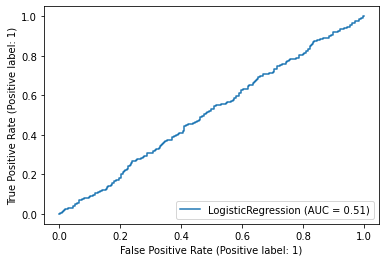

In [27]:
# validate on the validation data set using Receiver Operating Characteristic (ROC) curve
plt.figure(figsize=(10,10))
plot_roc_curve(lr, X_validate, y_validate)
plt.show()

AUC is 0.51, Logistic Regression model is not doing great here. We are expecting higher probability and the more AUC closer to 1.0, the better.
Let's move on to the next model.

### Decision Tree

Decision Tree can be used for solving regression and classigication problem. It is easily to understand and intepret compared to other models.

In [28]:
from sklearn.tree import DecisionTreeClassifier # for DT model

In [29]:
# train the decision tree model
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

<Figure size 720x720 with 0 Axes>

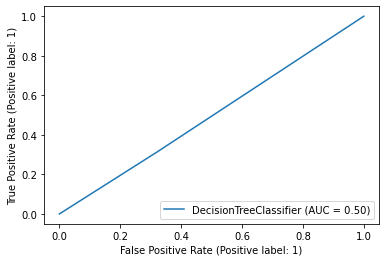

In [30]:
# evaluate the model on validation data
plt.figure(figsize=(10,10))
plot_roc_curve(dt, X_validate, y_validate)
plt.show()

AUC is 0.50, the model is not doing greater than logistic regression. 

# Random Forest

Random Forest is an ensemble method and built on the idea of bagging. The logic of ensemble method is to combine multiple weaker learner, and create a stronger learner.

One of the avantage of random forest is it generates decision trees that are uncorrected to promote diversity among trees because random forest makes a set of decision trees.

In [31]:
from sklearn.ensemble import RandomForestClassifier

# train the random forest model
rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

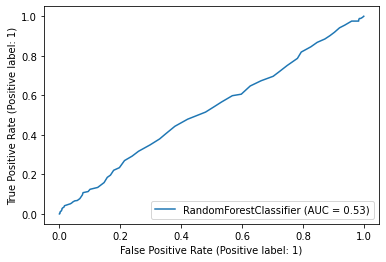

In [32]:
plot_roc_curve(rf, X_validate, y_validate)

This model is doing slightly better than the previous models; since the AUC (0.53) is greater. However, we are still looking for AUC value closer to 1.0, random forest is not an optimal choice.

# Gradient Boosting Ensemble

Another ensemble method, Gradient Boosting Ensemble, which is adaptively chaning distribution of training data by focusing more on previously misclassified records. 

In [33]:
# train the GBE model
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=25)

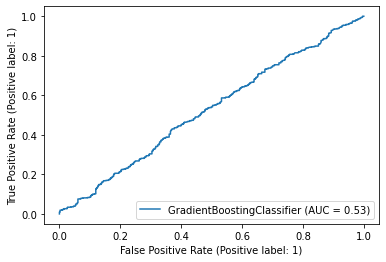

In [34]:
plot_roc_curve(gb, X_validate, y_validate)

Gradient Boosting Emsemble produces the same AUC = 0.53 as Random Forest. 

# Deep Learning Algorithm

Tensorflow and Keras will be using here to create a small neural network. 

In [36]:
import tensorflow as tf

In [40]:
# create a model
tf.random.set_seed(RANDOM_SEED)

# since the model has one input tensor we will be using Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [44]:
# configures model for training
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

In [41]:
# this is for a case of overfitting
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [45]:
# fit the model
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_validate, y_validate),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
269/269 [==============================] - 1s 2ms/step - loss: 5881.7256 - auc: 0.4972 - val_loss: 0.6943 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50
269/269 [==============================] - 0s 1ms/step - loss: 142.1944 - auc: 0.5012 - val_loss: 0.6979 - val_auc: 0.5000 - lr: 0.0010
Epoch 3/50
269/269 [==============================] - 0s 1ms/step - loss: 89.9011 - auc: 0.5015 - val_loss: 0.7013 - val_auc: 0.5000 - lr: 0.0010
Epoch 4/50
269/269 [==============================] - 0s 1ms/step - loss: 17.3734 - auc: 0.4992 - val_loss: 0.7034 - val_auc: 0.5000 - lr: 0.0010
Epoch 5/50
269/269 [==============================] - 0s 1ms/step - loss: 17.3607 - auc: 0.4960 - val_loss: 0.7053 - val_auc: 0.5000 - lr: 0.0010
Epoch 6/50
269/269 [==============================] - 0s 1ms/step - loss: 11.1974 - auc: 0.4985 - val_loss: 0.7062 - val_auc: 0.5000 - lr: 9.9005e-04
Epoch 7/50
269/269 [==============================] - 0s 1ms/step - loss: 9.6152 - auc: 0.4969 - val_loss: 0.7069 - v

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                100       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 180
Trainable params: 161
Non-trainable params: 19
_______________________________________________________

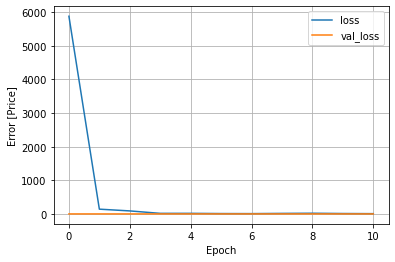

In [47]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

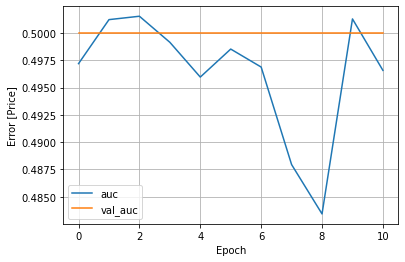

In [48]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

AUC does not improve, so ANN is not our choice. 

# Conclusion

Based on the AUC value, the winner here is Random Forest and Gradient Boosting Ensemble with AUC of 0.53.  

The factors that have higher impact on the stock price prediction are Price Range, Moving Average 7, Price Direction, Volume, and lastly Moving Average 3. 

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

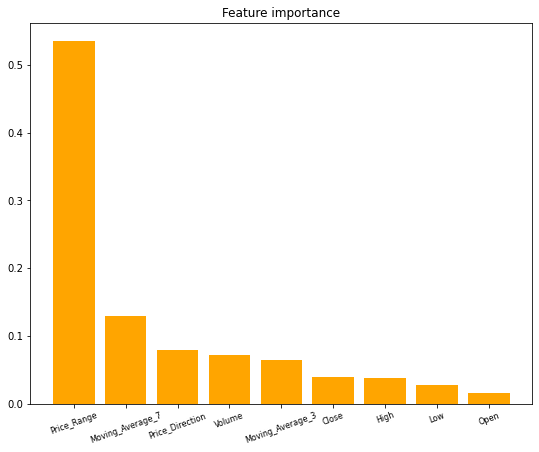

In [56]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train[X].columns[i] for i in indices]

plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices], color = "orange")
plt.title("Feature importance")
plt.xticks(rotation=20, fontsize = 8)